# Chapter 2.1 — Self-Attention Explained

In this notebook, we implement scaled dot-product self-attention, the core mechanism of the Transformer architecture introduced in *Vaswani et al., 2017 — Attention Is All You Need*.

We will build intuition and verify how queries, keys, and values interact to form contextual token representations.

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(0)

## 1. Input Embeddings (Dummy Example)

We will create a small batch of embeddings to simulate three tokens in one sequence.

In [2]:
batch_size = 1
seq_len = 3
d_model = 4  # embedding dimension

x = torch.randn(batch_size, seq_len, d_model)
x

tensor([[[ 1.5410, -0.2934, -2.1788,  0.5684],
         [-1.0845, -1.3986,  0.4033,  0.8380],
         [-0.7193, -0.4033, -0.5966,  0.1820]]])

## 2. Linear Projections: Queries (Q), Keys (K), Values (V)

Each token produces a Query, Key, and Value vector using learnable linear transformations.

In [3]:
W_Q = torch.nn.Linear(d_model, d_model, bias=False)
W_K = torch.nn.Linear(d_model, d_model, bias=False)
W_V = torch.nn.Linear(d_model, d_model, bias=False)

Q = W_Q(x)
K = W_K(x)
V = W_V(x)

Q.shape, K.shape, V.shape

(torch.Size([1, 3, 4]), torch.Size([1, 3, 4]), torch.Size([1, 3, 4]))

## 3. Scaled Dot-Product Attention

We compute similarity between Queries and Keys, scale by √d_k, apply softmax, then weight the Values.

In [4]:
d_k = K.size(-1)
scores = torch.matmul(Q, K.transpose(-2, -1)) / d_k**0.5
attn = F.softmax(scores, dim=-1)
output = torch.matmul(attn, V)

print('Attention weights:\n', attn)
print('\nOutput representations:\n', output)

Attention weights:
 tensor([[[0.3484, 0.3430, 0.3087],
         [0.1911, 0.4861, 0.3228],
         [0.2104, 0.4680, 0.3216]]], grad_fn=<SoftmaxBackward0>)

Output representations:
 tensor([[[ 0.4075,  0.1652,  0.0763, -0.1460],
         [ 0.2871, -0.0702, -0.0142, -0.5062],
         [ 0.3020, -0.0410, -0.0032, -0.4614]]], grad_fn=<UnsafeViewBackward0>)


## 4. Visualize Attention Weights

We can visualize how each token attends to others using a heatmap.

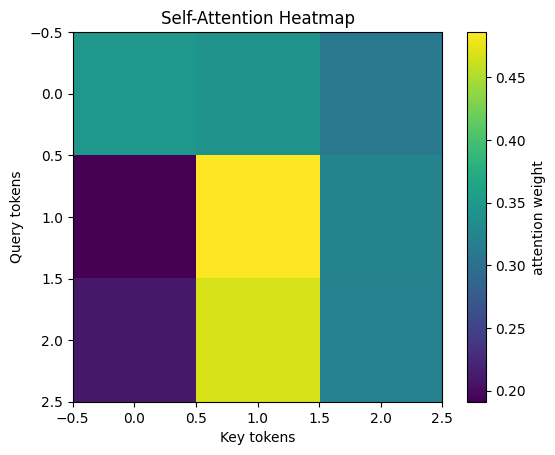

In [5]:
plt.imshow(attn[0].detach(), cmap='viridis')
plt.colorbar(label='attention weight')
plt.xlabel('Key tokens')
plt.ylabel('Query tokens')
plt.title('Self-Attention Heatmap')
plt.show()

## 5. Interpretation

- Each row of the heatmap corresponds to one query token.
- Bright cells indicate which key tokens that query attends to most strongly.
- The output vector for each token is a weighted mixture of the value vectors, enabling contextual understanding.

This simple block scales into multi-head attention and full Transformer layers.

### References
- Vaswani et al., *Attention Is All You Need*, 2017
- Sebastian Raschka, *Build a Large Language Model (From Scratch)*, Chapter 6